## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [12]:
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
%matplotlib inline

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane.

# Make a list of calibration images
images = glob.glob('./camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)
#         print(objp)
        imgpoints.append(corners)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (9,6), corners, ret)
#         cv2.imshow('img',img)
#         cv2.waitKey(500)

# cv2.destroyAllWindows()

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2

[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2. 3. 0.]
 [3. 3. 0.]
 [4. 3. 0.]
 [5. 3. 0.]
 [6. 3. 0.]
 [7. 3. 0.]
 [8. 3. 0.]
 [0. 4. 0.]
 [1. 4. 0.]
 [2. 4. 0.]
 [3. 4. 0.]
 [4. 4. 0.]
 [5. 4. 0.]
 [6. 4. 0.]
 [7. 4. 0.]
 [8. 4. 0.]
 [0. 5. 0.]
 [1. 5. 0.]
 [2. 5. 0.]
 [3. 5. 0.]
 [4. 5. 0.]
 [5. 5. 0.]
 [6. 5. 0.]
 [7. 5. 0.]
 [8. 5. 0.]]
[[0. 0. 0.]
 [1. 0. 0.]
 [2. 0. 0.]
 [3. 0. 0.]
 [4. 0. 0.]
 [5. 0. 0.]
 [6. 0. 0.]
 [7. 0. 0.]
 [8. 0. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 [2. 1. 0.]
 [3. 1. 0.]
 [4. 1. 0.]
 [5. 1. 0.]
 [6. 1. 0.]
 [7. 1. 0.]
 [8. 1. 0.]
 [0. 2. 0.]
 [1. 2. 0.]
 [2. 2. 0.]
 [3. 2. 0.]
 [4. 2. 0.]
 [5. 2. 0.]
 [6. 2. 0.]
 [7. 2. 0.]
 [8. 2. 0.]
 [0. 3. 0.]
 [1. 3. 0.]
 [2

## Compute the matrix and distortion coefficients, and apply undistortion to raw images

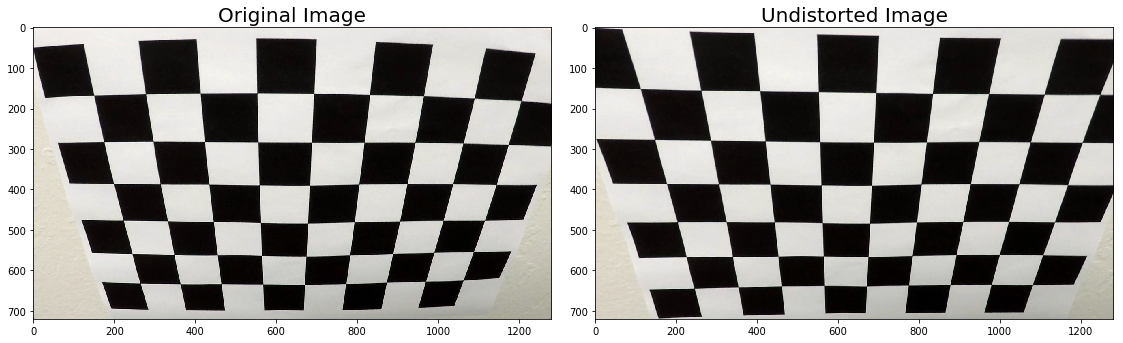

In [2]:
# Read in an image
img = cv2.imread('./camera_cal/calibration2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# TODO: Write a function that takes an image, object points, and image points
# performs the camera calibration, image distortion correction and 
# returns the undistorted image
def cal_undistort(img, objpoints, imgpoints):
    # Use cv2.calibrateCamera() and cv2.undistort()
    # undist = np.copy(img)  # Delete this line
    img_size = (img.shape[1], img.shape[0])
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)
    return dst

undistorted = cal_undistort(img, objpoints, imgpoints)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Use color transforms, gradients, etc., to create a thresholded binary image

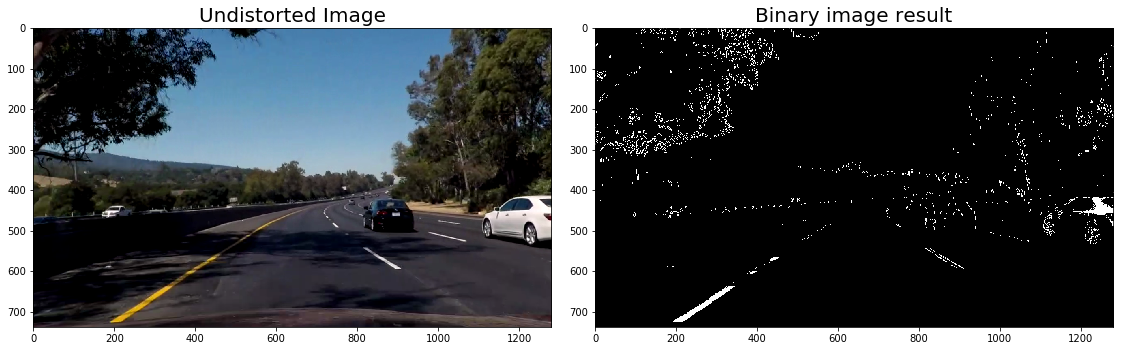

In [3]:

# read the test image, and undistort it 
img = cv2.imread('./test_images/test4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cal_undistort(img, objpoints, imgpoints)

# Edit this function to create your own pipeline.
def pipeline(img):

    hls = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
    s_channel = hls[:,:,2]
    h_channel = hls[:,:,0]
    
    hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    v_channel = hsv[:,:,2]
    

    # Grayscale image
    # NOTE: we already saw that standard grayscaling lost color information for the lane lines
    # Explore gradients in other colors spaces / color channels to see what might work better
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # Sobel x
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Threshold x gradient
    thresh_min = 50
    thresh_max = 100
    sxbinary = np.zeros_like(scaled_sobel)
    sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

    # Threshold color channel
    s_thresh_min = 120
    s_thresh_max = 255
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh_min) & (s_channel <= s_thresh_max)] = 1
    
    # Threshold yellow
    yellow_thresh_min = 15
    yellow_thresh_max = 25
    yellow_binary = np.zeros_like(h_channel)
    yellow_binary[(h_channel >= yellow_thresh_min) & (h_channel <= yellow_thresh_max)] = 1

    # Threshold white
    white_thresh_min = 150
    white_binary = np.zeros_like(v_channel)
    white_binary[(v_channel >= white_thresh_min)] = 1
    
    # Stack each channel to view their individual contributions in green and blue respectively
    # This returns a stack of the two binary images, whose components you can see as different colors
#     color_binary = np.dstack(( np.zeros_like(sxbinary), sxbinary, s_binary)) * 255

    # Combine the two binary thresholds
    combined_binary = np.zeros_like(sxbinary)
#     combined_binary[(s_binary == 1) | ((sxbinary == 1) & (yellow_binary == 1))] = 1
#     combined_binary[(s_binary == 1) & ((yellow_binary == 1) | (white_binary ==1))] = 1
    combined_binary[((s_binary == 1) & (white_binary == 1) | (sxbinary == 1))] = 1
    return combined_binary
    
result = pipeline(image)
# print(result.shape)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout()

ax1.imshow(image)
ax1.set_title('Undistorted Image', fontsize=20)

ax2.imshow(result, cmap='gray')
ax2.set_title('Binary image result', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

## Apply a perspective transform to rectify binary image ("birds-eye view")

(738, 1280, 3)


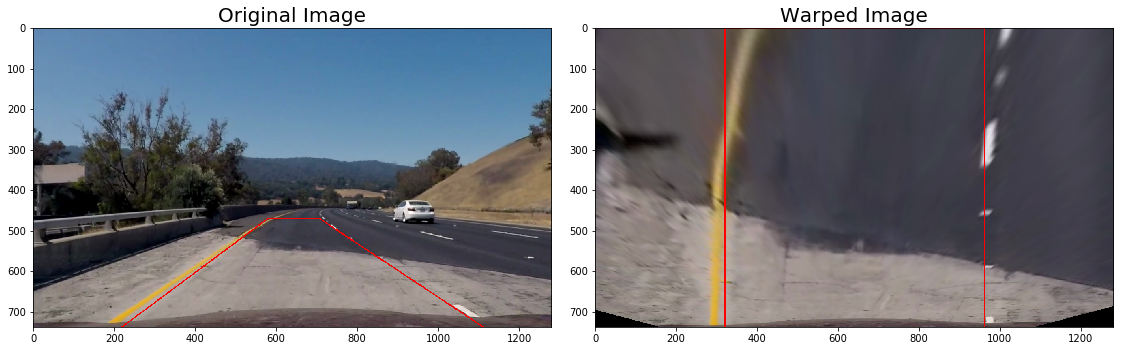

In [4]:

# img = cv2.imread('./test_images/straight_lines1.jpg')
img = cv2.imread('./test_images/test2.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cal_undistort(img, objpoints, imgpoints)

img_size = image.shape
print(img_size)

src = np.float32(
    [[(img_size[1] / 2) - 60, img_size[0] / 2 + 100],
    [((img_size[1] / 6) + 5), img_size[0]],
    [(img_size[1] * 5 / 6) + 45, img_size[0]],
    [(img_size[1] / 2 + 65), img_size[0] / 2 + 100]])
dst = np.float32(
    [[(img_size[1] / 4), 0],
    [(img_size[1] / 4), img_size[0]],
    [(img_size[1] * 3 / 4), img_size[0]],
    [(img_size[1] * 3 / 4), 0]])

# print(src)
# print(dst)
src_int = np.int32(src)
dst_int = np.int32(dst)
src_int = src_int.reshape((-1, 4, 2))
dst_int = dst_int.reshape((-1, 4, 2))
# print(src_int.shape)
# print(dst_int)
road_img = np.copy(image)

# cv2.rectangle(road_img, (int(img_size[1]/2-440), 450), (int(img_size[1]/2+440), 720), (0, 0, 255), 5)
# cv2.rectangle(road_img, (int(img_size[1]/2-50), 450), (int(img_size[1]/2+50), 720), (0, 255, 0), 5)
# plt.imshow(road_img)



M = cv2.getPerspectiveTransform(src, dst)

warped = cv2.warpPerspective(road_img, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)
warped_line = np.copy(warped)

cv2.polylines(road_img, src_int, True, (255, 0, 0), 2)
cv2.polylines(warped_line, dst_int, True, (255, 0, 0), 2)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout()
ax1.imshow(road_img)
ax1.set_title('Original Image', fontsize=20)
ax2.imshow(warped_line)
ax2.set_title('Warped Image', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


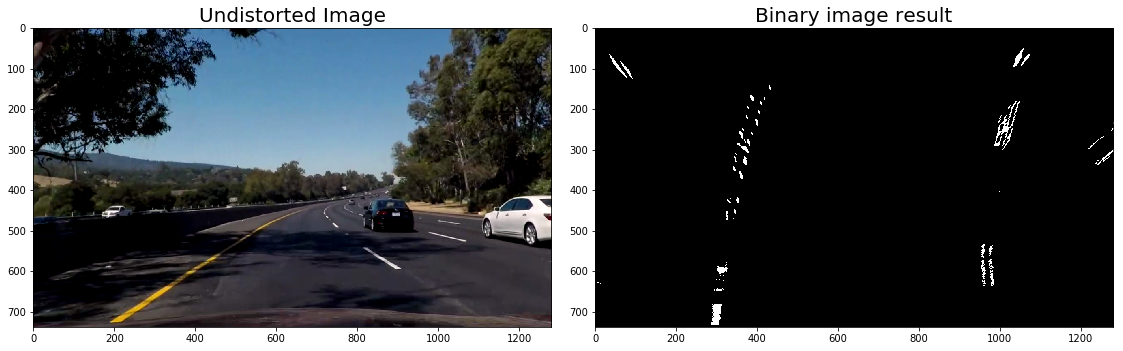

In [5]:

# img = cv2.imread('./test_images/straight_lines1.jpg')
img = cv2.imread('./test_images/test4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
image = cal_undistort(img, objpoints, imgpoints)
result = pipeline(image)
warped = cv2.warpPerspective(result, M, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)

# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))
f.tight_layout()

ax1.imshow(image, cmap='gray')
# ax1.imshow(image, cmap='gray')
ax1.set_title('Undistorted Image', fontsize=20)

ax2.imshow(warped, cmap='gray')
ax2.set_title('Binary image result', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

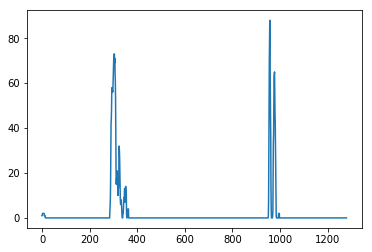

left points numbers: 2999
right points numbers: 3040
Lane weight: R
left fit:  [ 1.64772996e-04 -3.34800747e-01  4.53030519e+02]
right fit:  [ 2.42217263e-04 -3.26629624e-01  1.07489908e+03]


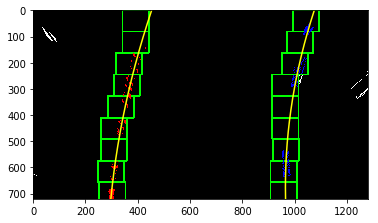

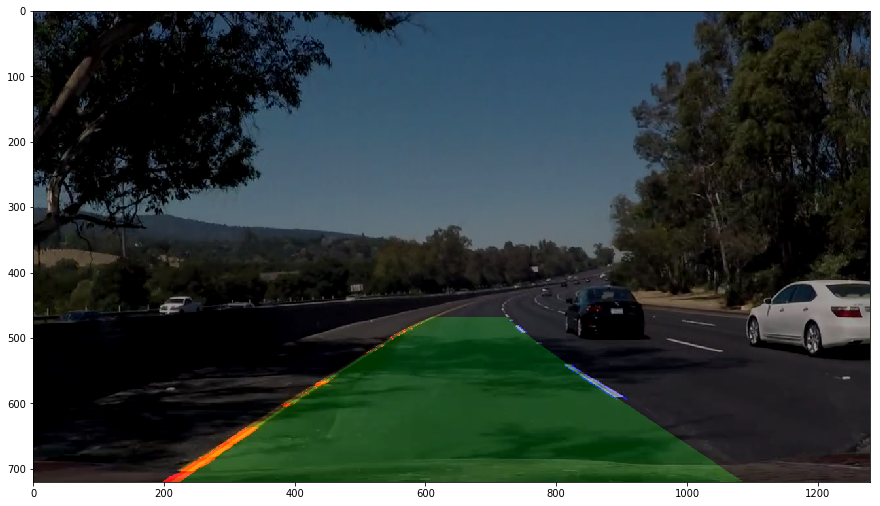

In [6]:


# Read in a thresholded image
binary_warped = warped

histogram = np.sum(binary_warped[binary_warped.shape[0] // 2:, :], axis=0)
plt.plot(histogram)
plt.show()

# Assuming you have created a warped binary image called "binary_warped"
# Take a histogram of the bottom half of the image
histogram = np.sum(binary_warped[binary_warped.shape[0] // 2:, :], axis=0)
# Create an output image to draw on and  visualize the result
out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
# Find the peak of the left and right halves of the histogram
# These will be the starting point for the left and right lines
one_third = np.int(histogram.shape[0] // 3)
leftx_base = np.argmax(histogram[:one_third])
rightx_base = np.argmax(histogram[2*one_third:]) + 2*one_third

# Choose the number of sliding windows
nwindows = 9
# Set height of windows
window_height = np.int(binary_warped.shape[0] // nwindows)
# Identify the x and y positions of all nonzero pixels in the image
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
# print(nonzero)
# print(nonzeroy.shape)
# print(nonzerox.shape)

# Current positions to be updated for each window
leftx_current = leftx_base
rightx_current = rightx_base
# Set the width of the windows +/- margin
margin = 50
# Set minimum number of pixels found to recenter window
minpix = 50
# Create empty lists to receive left and right lane pixel indices
left_lane_inds = []
right_lane_inds = []

# Step through the windows one by one
for window in range(nwindows):
    # Identify window boundaries in x and y (and right and left)
    win_y_low = binary_warped.shape[0] - (window + 1) * window_height
    win_y_high = binary_warped.shape[0] - window * window_height
    # print("y low: ", win_y_low, " y high: ", win_y_high)
    win_xleft_low = leftx_current - margin
    win_xleft_high = leftx_current + margin
    win_xright_low = rightx_current - margin
    win_xright_high = rightx_current + margin
    # Draw the windows on the visualization image
    cv2.rectangle(out_img, (win_xleft_low, win_y_low), (win_xleft_high, win_y_high),
                  (0, 255, 0), 5)
    cv2.rectangle(out_img, (win_xright_low, win_y_low), (win_xright_high, win_y_high),
                  (0, 255, 0), 5)
    # Identify the nonzero pixels in x and y within the window
    good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                      (nonzerox >= win_xleft_low) & (nonzerox < win_xleft_high)).nonzero()[0]
    good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) &
                       (nonzerox >= win_xright_low) & (nonzerox < win_xright_high)).nonzero()[0]
    # print(nonzeroy >= win_y_low)
    # print(good_left_inds)
    # print(good_left_inds.shape)
    # Append these indices to the lists
    left_lane_inds.append(good_left_inds)
    right_lane_inds.append(good_right_inds)
    # If you found > minpix pixels, recenter next window on their mean position
    if len(good_left_inds) > minpix:
        leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
    if len(good_right_inds) > minpix:
        rightx_current = np.int(np.mean(nonzerox[good_right_inds]))


        
# Concatenate the arrays of indices
# print(left_lane_inds)
left_lane_inds = np.concatenate(left_lane_inds)
# print(left_lane_inds)
right_lane_inds = np.concatenate(right_lane_inds)

print("left points numbers:", len(left_lane_inds))
print("right points numbers:", len(right_lane_inds))
lane_weight = "L"
if len(left_lane_inds) < len(right_lane_inds):
    lane_weight = "R"
print("Lane weight:", lane_weight)

# Extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds]
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]

# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)

# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
# print(ploty)
print('left fit: ', left_fit)
print('right fit: ', right_fit)
left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]
plt.imshow(out_img)
plt.plot(left_fitx, ploty, color='yellow')
plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()

# ----------------------------------------------------
# Assume you now have a new warped binary image
# from the next frame of video (also called "binary_warped")
# It's now much easier to find line pixels!
nonzero = binary_warped.nonzero()
nonzeroy = np.array(nonzero[0])
nonzerox = np.array(nonzero[1])
margin = 100
left_lane_inds = ((nonzerox > (left_fit[0] * (nonzeroy ** 2) + left_fit[1] * nonzeroy +
                               left_fit[2] - margin)) & (nonzerox < (left_fit[0] * (nonzeroy ** 2) +
                                                                     left_fit[1] * nonzeroy + left_fit[2] + margin)))

right_lane_inds = ((nonzerox > (right_fit[0] * (nonzeroy ** 2) + right_fit[1] * nonzeroy +
                                right_fit[2] - margin)) & (nonzerox < (right_fit[0] * (nonzeroy ** 2) +
                                                                       right_fit[1] * nonzeroy + right_fit[
                                                                           2] + margin)))

# Again, extract left and right line pixel positions
leftx = nonzerox[left_lane_inds]
lefty = nonzeroy[left_lane_inds]
rightx = nonzerox[right_lane_inds]
righty = nonzeroy[right_lane_inds]
# Fit a second order polynomial to each
left_fit = np.polyfit(lefty, leftx, 2)
right_fit = np.polyfit(righty, rightx, 2)
# Generate x and y values for plotting
ploty = np.linspace(0, binary_warped.shape[0] - 1, binary_warped.shape[0])
left_fitx = left_fit[0] * ploty ** 2 + left_fit[1] * ploty + left_fit[2]
right_fitx = right_fit[0] * ploty ** 2 + right_fit[1] * ploty + right_fit[2]

# Create an image to draw on and an image to show the selection window
out_img = np.dstack((binary_warped, binary_warped, binary_warped)) * 255
out_img[::] = [0, 0, 0]
window_img = np.zeros_like(out_img)
# window_img = np.zeros((720, 1280, 3))
# Color in left and right line pixels
out_img[nonzeroy[left_lane_inds], nonzerox[left_lane_inds]] = [255, 0, 0]
out_img[nonzeroy[right_lane_inds], nonzerox[right_lane_inds]] = [0, 0, 255]

# Generate a polygon to illustrate the search window area
# And recast the x and y points into usable format for cv2.fillPoly()
left_line_window1 = np.array([np.transpose(np.vstack([left_fitx - margin, ploty]))])
left_line_window2 = np.array([np.flipud(np.transpose(np.vstack([left_fitx + margin,
                                                                ploty])))])
left_line_pts = np.hstack((left_line_window1, left_line_window2))

right_line_window1 = np.array([np.transpose(np.vstack([right_fitx - margin, ploty]))])
right_line_window2 = np.array([np.flipud(np.transpose(np.vstack([right_fitx + margin,
                                                                 ploty])))])
right_line_pts = np.hstack((right_line_window1, right_line_window2))

window_left_line = np.array([np.transpose(np.vstack([left_fitx, ploty]))])
window_right_line = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])
window_line_pts = np.hstack((window_left_line, window_right_line))

# Draw the lane onto the warped blank image
# cv2.fillPoly(window_img, np.int_([left_line_pts]), (0, 255, 0))
# cv2.fillPoly(window_img, np.int_([right_line_pts]), (0, 255, 0))
cv2.fillPoly(window_img, np.int_([window_line_pts]), (0, 255, 0))

result = cv2.addWeighted(out_img, 0.8, window_img, 0.2, 0)

Minv = cv2.getPerspectiveTransform(dst, src)
window_inv = cv2.warpPerspective(result, Minv, (img.shape[1], img.shape[0]), flags=cv2.INTER_LINEAR)

output = cv2.addWeighted(window_inv, 1, img, 0.6, 0)

plt.figure(figsize=(15, 15))
plt.imshow(output)

# plt.plot(left_fitx, ploty, color='yellow')
# plt.plot(right_fitx, ploty, color='yellow')
plt.xlim(0, 1280)
plt.ylim(720, 0)
plt.show()


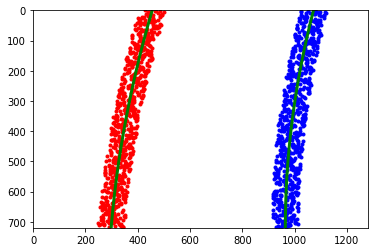

In [7]:

# Generate some fake data to represent lane-line pixels
ploty = np.linspace(0, 719, num=720)# to cover same y-range as image

# y_eval = np.max(ploty)
# left_curverad_1 = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
# right_curverad_1 = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
# print(left_curverad_1, right_curverad_1)

# quadratic_coeff = 3e-4 # arbitrary quadratic coefficient
# For each y position generate random x position within +/-50 pix
# of the line base position in each case (x=200 for left, and x=900 for right)
# leftx = np.array([200 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
#                               for y in ploty])
# rightx = np.array([900 + (y**2)*quadratic_coeff + np.random.randint(-50, high=51) 
#                                 for y in ploty])

leftx = np.array([left_fit[2] + (y**2)*left_fit[0] + left_fit[1]*y + np.random.randint(-50, high=51) 
                              for y in ploty])
rightx = np.array([right_fit[2] + (y**2)*right_fit[0] + right_fit[1]*y + np.random.randint(-50, high=51) 
                                for y in ploty])


# leftx = leftx[::-1]  # Reverse to match top-to-bottom in y
# rightx = rightx[::-1]  # Reverse to match top-to-bottom in y


# Fit a second order polynomial to pixel positions in each fake lane line
left_fit = np.polyfit(ploty, leftx, 2)
left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
right_fit = np.polyfit(ploty, rightx, 2)
right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]

# Plot up the fake data
mark_size = 3
plt.plot(leftx, ploty, 'o', color='red', markersize=mark_size)
plt.plot(rightx, ploty, 'o', color='blue', markersize=mark_size)
plt.xlim(0, 1280)
plt.ylim(0, 720)
plt.plot(left_fitx, ploty, color='green', linewidth=3)
plt.plot(right_fitx, ploty, color='green', linewidth=3)
plt.gca().invert_yaxis() # to visualize as we do the images

In [8]:
# Define y-value where we want radius of curvature
# I'll choose the maximum y-value, corresponding to the bottom of the image
y_eval = np.max(ploty)
left_curverad = ((1 + (2*left_fit[0]*y_eval + left_fit[1])**2)**1.5) / np.absolute(2*left_fit[0])
right_curverad = ((1 + (2*right_fit[0]*y_eval + right_fit[1])**2)**1.5) / np.absolute(2*right_fit[0])
print(left_curverad, right_curverad)
# Example values: 1926.74 1908.48

2976.392781951944 2401.4000193062734


In [9]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(ploty*ym_per_pix, leftx*xm_per_pix, 2)
right_fit_cr = np.polyfit(ploty*ym_per_pix, rightx*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

curvature_weight = left_curverad
if lane_weight == "L":
    print("left weight")
else:
    print("right weight")
    curvature_weight = right_curverad
    
curvature_text = "Radius of curvature = %.1f" % curvature_weight + "m"

964.5424301352997 m 788.7481243827358 m
right weight


In [10]:
# need to calculate 
maxy = 719
lx=left_fit[0]*maxy**2 + left_fit[1]*maxy + left_fit[2]
rx=right_fit[0]*maxy**2 + right_fit[1]*maxy + right_fit[2]
road_center = (lx + rx) / 2

car_center = 1280 / 2
gap = (road_center - car_center) * xm_per_pix
gap = abs(gap)
print(lx)
print(rx)
print("road center", road_center)
pos = ''
if gap > 0:
    pos = 'left of'
elif gap < 0:
    pos = 'right of'

position_text = "The vehicle is %.2f" %gap + " m " + pos + " center."
print(position_text)

298.6117166401193
964.4425079524747
road center 631.527112296297
The vehicle is 0.04 m left of center.


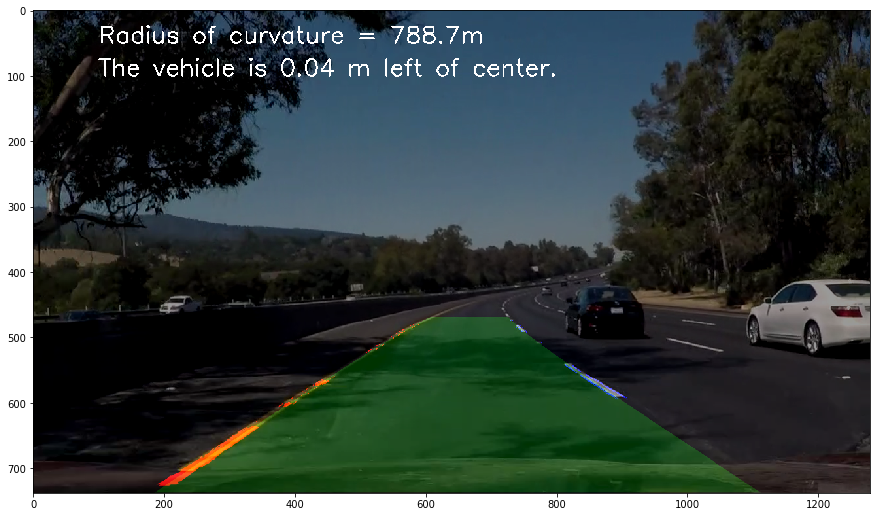

In [11]:
font = cv2.FONT_ITALIC
output = cv2.putText(output, curvature_text, (100, 50), font, 1.2, (255, 255, 255), 2)
output = cv2.putText(output, position_text, (100, 100), font, 1.2, (255, 255, 255), 2)
plt.figure(figsize=(15, 15))
plt.imshow(output)